In [70]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

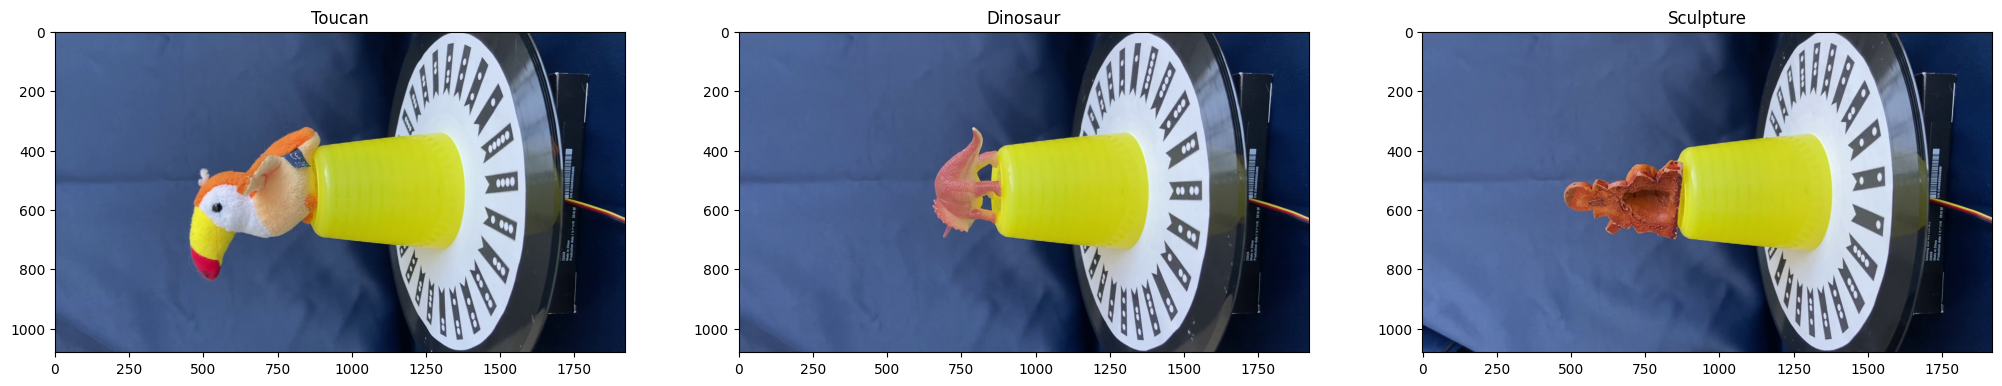

In [71]:
obj1 = cv.imread("./assignment1_test_dataset/obj01/000002.png").astype(np.uint8)
obj2 = cv.imread("./assignment1_test_dataset/obj02/000002.png").astype(np.uint8)
obj4 = cv.imread("./assignment1_test_dataset/obj04/000002.png").astype(np.uint8)

rgb_obj1 = cv.cvtColor(obj1, cv.COLOR_BGR2RGB)
rgb_obj2 = cv.cvtColor(obj2, cv.COLOR_BGR2RGB)
rgb_obj4 = cv.cvtColor(obj4, cv.COLOR_BGR2RGB)

plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
plt.title("Toucan")
plt.imshow(rgb_obj1)
plt.subplot(1,3,2)
plt.title("Dinosaur")
plt.imshow(rgb_obj2)
plt.subplot(1,3,3)
plt.title("Sculpture")
plt.imshow(rgb_obj4)

In [72]:
def change_contrast(img):
	lab = cv.cvtColor(img, cv.COLOR_RGB2LAB)
	l_channel, a, b = cv.split(lab)

	# Applying CLAHE to L-channel
	#3.0, (5,5)
	l_clahe = cv.createCLAHE(clipLimit=8, tileGridSize=(13,13))
	l_channel = l_clahe.apply(l_channel)

	# merge the CLAHE enhanced L-channel with the a and b channel
	limg = cv.merge((l_channel,a,b))

	# Converting image from LAB Color model to BGR color spcae
	return cv.cvtColor(limg, cv.COLOR_LAB2RGB)

In [73]:
# Changing contrast and converting from RGB to HSV

enhanced_hsv1 = cv.cvtColor(change_contrast(rgb_obj1), cv.COLOR_RGB2HSV)
enhanced_hsv2 = cv.cvtColor(change_contrast(rgb_obj2), cv.COLOR_RGB2HSV)
enhanced_hsv4 = cv.cvtColor(change_contrast(rgb_obj4), cv.COLOR_RGB2HSV)

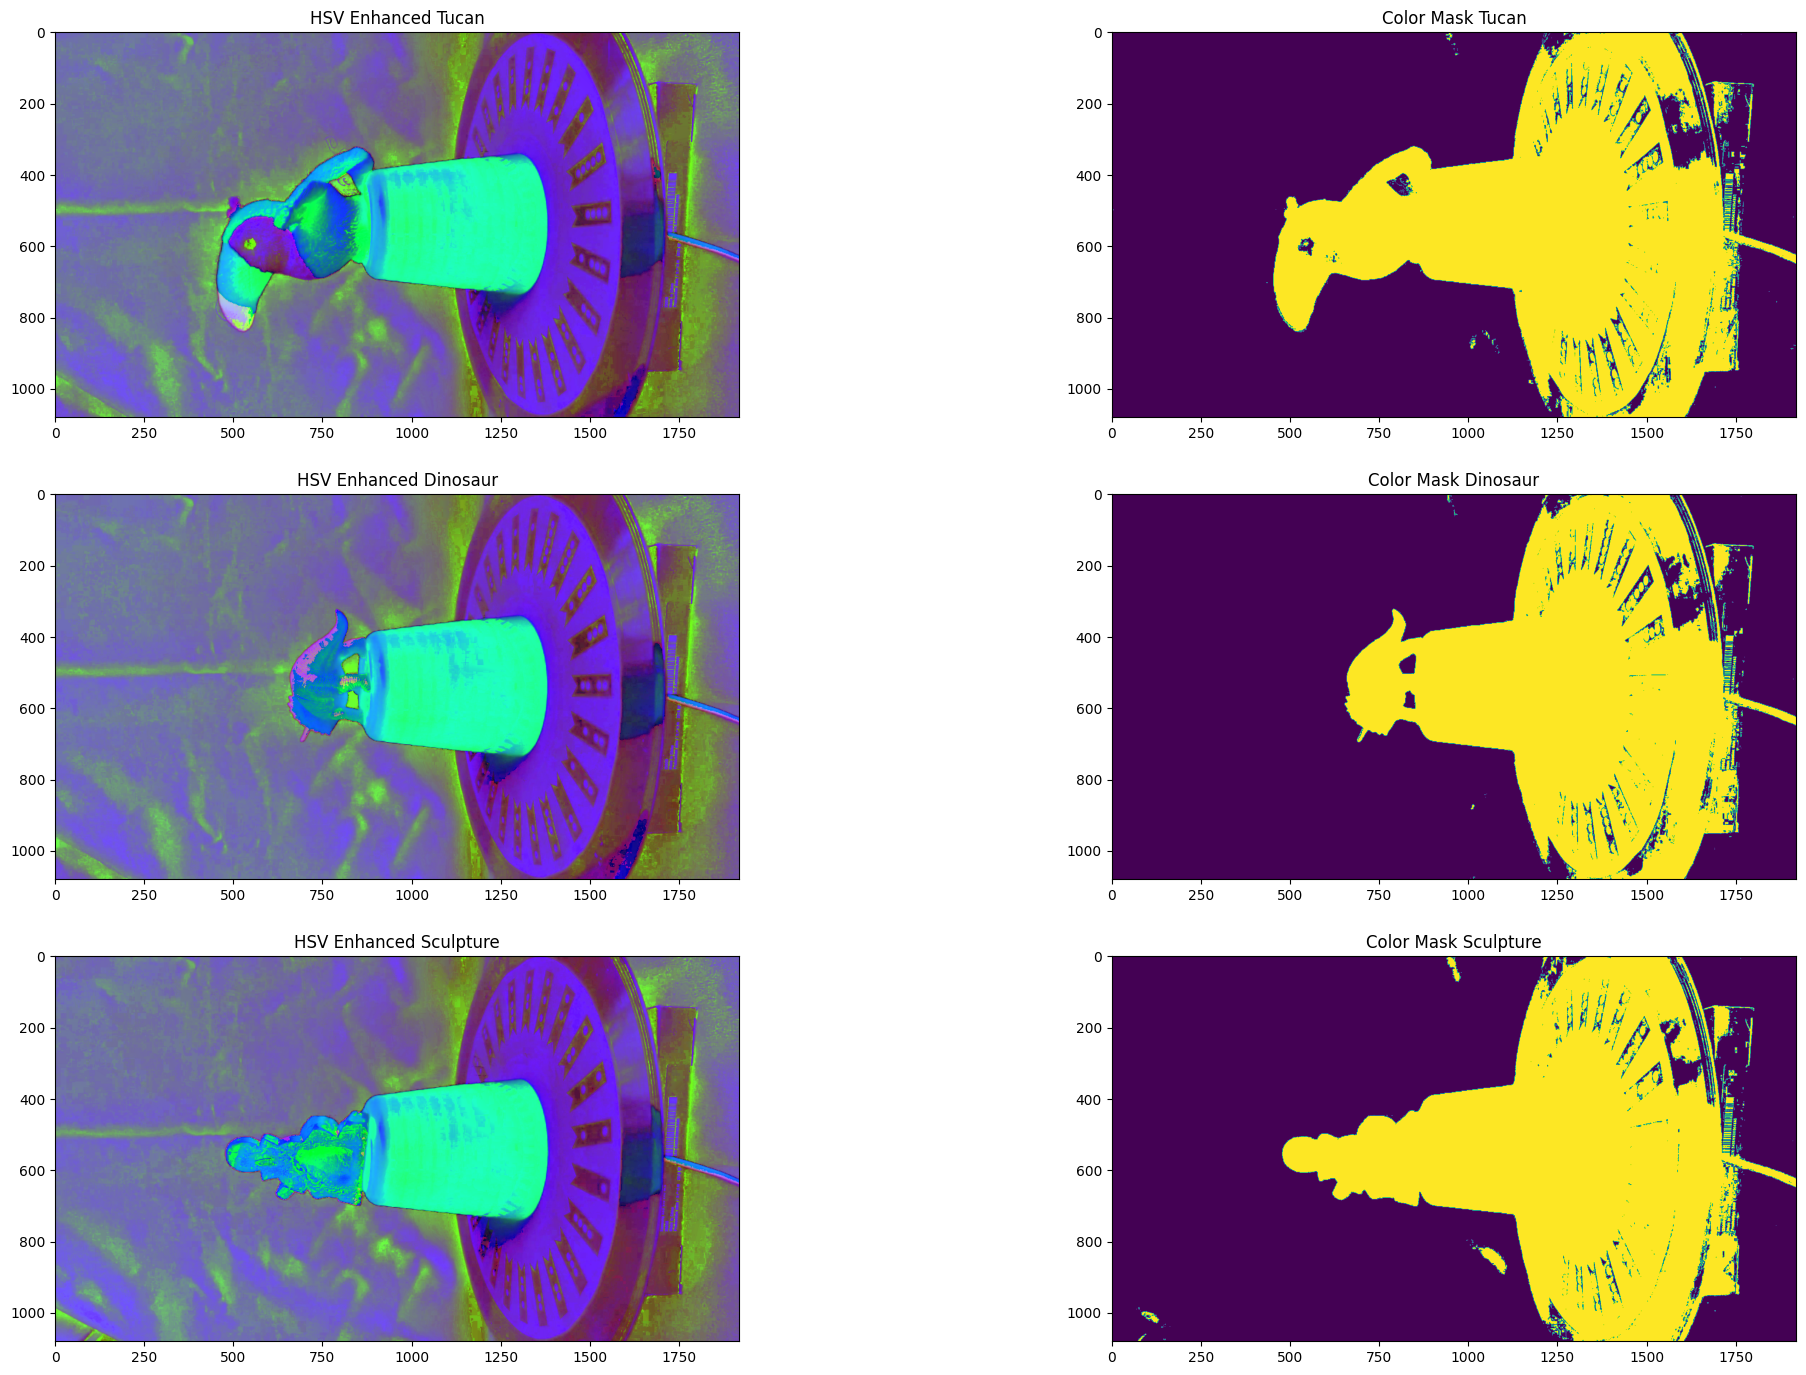

In [74]:

# Inverting the mask
color_mask_obj1 = cv.bitwise_not(cv.inRange(enhanced_hsv1, np.array([105,70,0]), np.array([165,255,255])))
color_mask_obj2 = cv.bitwise_not(cv.inRange(enhanced_hsv2, np.array([105,70,0]), np.array([165,255,255])))
color_mask_obj4 = cv.bitwise_not(cv.inRange(enhanced_hsv4, np.array([105,70,0]), np.array([165,255,255])))


plt.figure(figsize=(25,17))
plt.subplot(3,2,1)
plt.title("HSV Enhanced Tucan")
plt.imshow(enhanced_hsv1)

plt.subplot(3,2,2)
plt.title("Color Mask Tucan")
plt.imshow(color_mask_obj1)

plt.subplot(3,2,3)
plt.title("HSV Enhanced Dinosaur")
plt.imshow(enhanced_hsv2)

plt.subplot(3,2,4)
plt.title("Color Mask Dinosaur")
plt.imshow(color_mask_obj2)

plt.subplot(3,2,5)
plt.title("HSV Enhanced Sculpture")
plt.imshow(enhanced_hsv4)

plt.subplot(3,2,6)
plt.title("Color Mask Sculpture")
plt.imshow(color_mask_obj4)

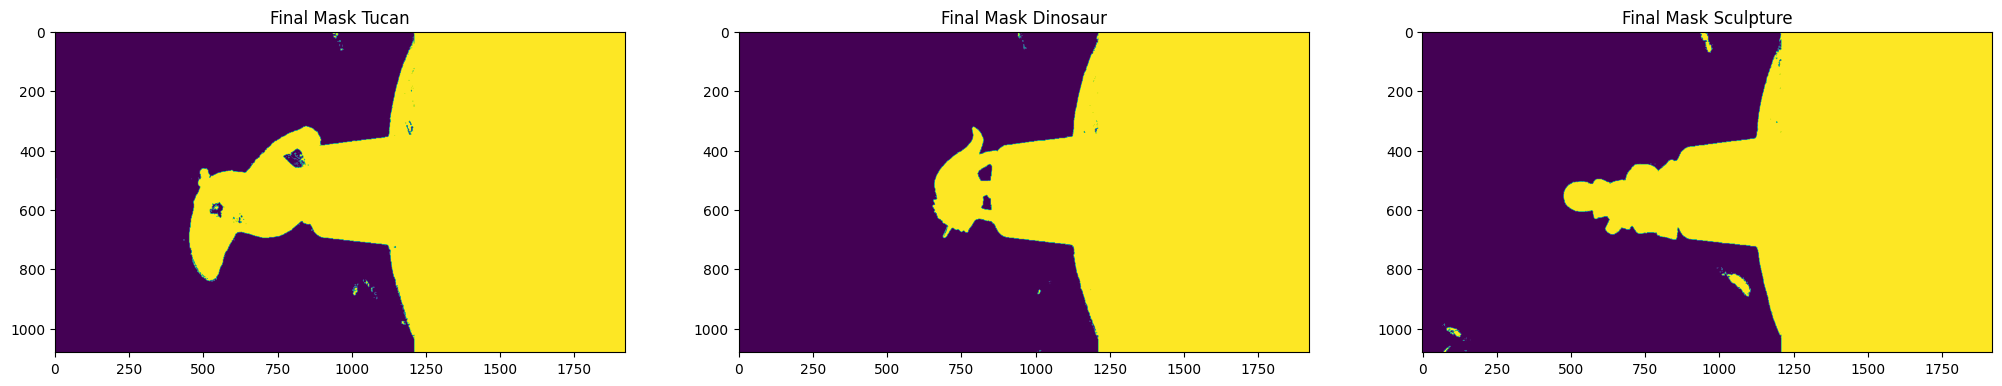

In [75]:
rectangular_mask = np.full(rgb_obj1.shape[:2], 0, np.uint8)
rectangular_mask[:,1210:rgb_obj1.shape[1]] = 255

mask_obj1 = cv.bitwise_or(color_mask_obj1, rectangular_mask)
mask_obj2 = cv.bitwise_or(color_mask_obj2, rectangular_mask)
mask_obj4 = cv.bitwise_or(color_mask_obj4, rectangular_mask)


plt.figure(figsize=(25,7))

plt.subplot(1,3,1)
plt.title("Final Mask Tucan")
plt.imshow(mask_obj1)

plt.subplot(1,3,2)
plt.title("Final Mask Dinosaur")
plt.imshow(mask_obj2)

plt.subplot(1,3,3)
plt.title("Final Mask Sculpture")
plt.imshow(mask_obj4)

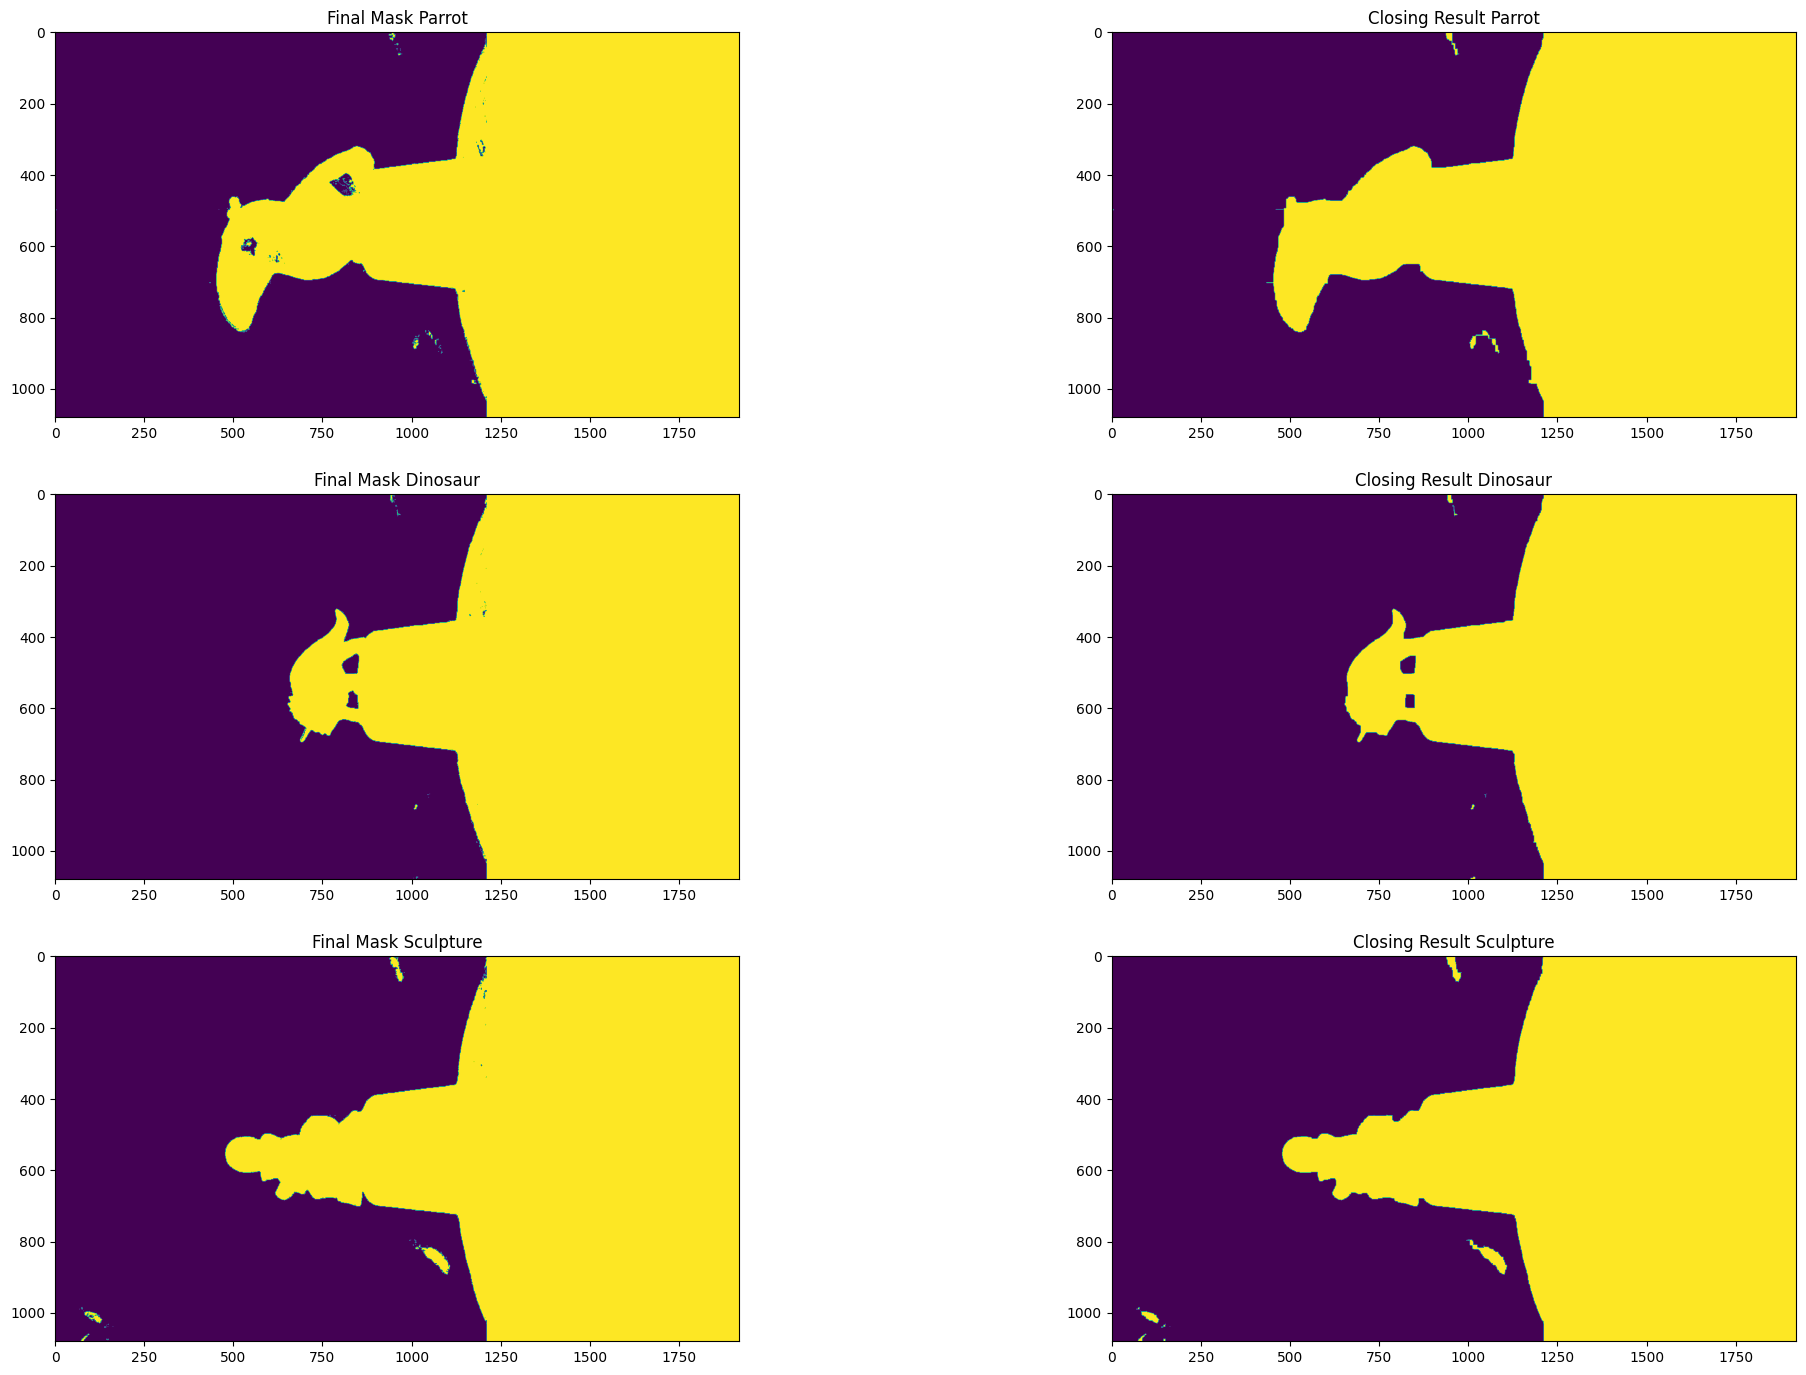

In [76]:
# CLOSING

kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
kernel2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))

closing_obj1= cv.morphologyEx(mask_obj1, cv.MORPH_CLOSE, kernel, iterations = 15)
closing_obj2= cv.morphologyEx(mask_obj2, cv.MORPH_CLOSE, kernel, iterations = 8)
closing_obj4= cv.morphologyEx(mask_obj4, cv.MORPH_CLOSE, kernel, iterations = 6)


plt.figure(figsize=(25,17))

plt.subplot(3,2,1)
plt.title("Final Mask Parrot")
plt.imshow(mask_obj1)

plt.subplot(3,2,2)
plt.title("Closing Result Parrot")
plt.imshow(closing_obj1)

plt.subplot(3,2,3)
plt.title("Final Mask Dinosaur")
plt.imshow(mask_obj2)

plt.subplot(3,2,4)
plt.title("Closing Result Dinosaur")
plt.imshow(closing_obj2)

plt.subplot(3,2,5)
plt.title("Final Mask Sculpture")
plt.imshow(mask_obj4)

plt.subplot(3,2,6)
plt.title("Closing Result Sculpture")
plt.imshow(closing_obj4)

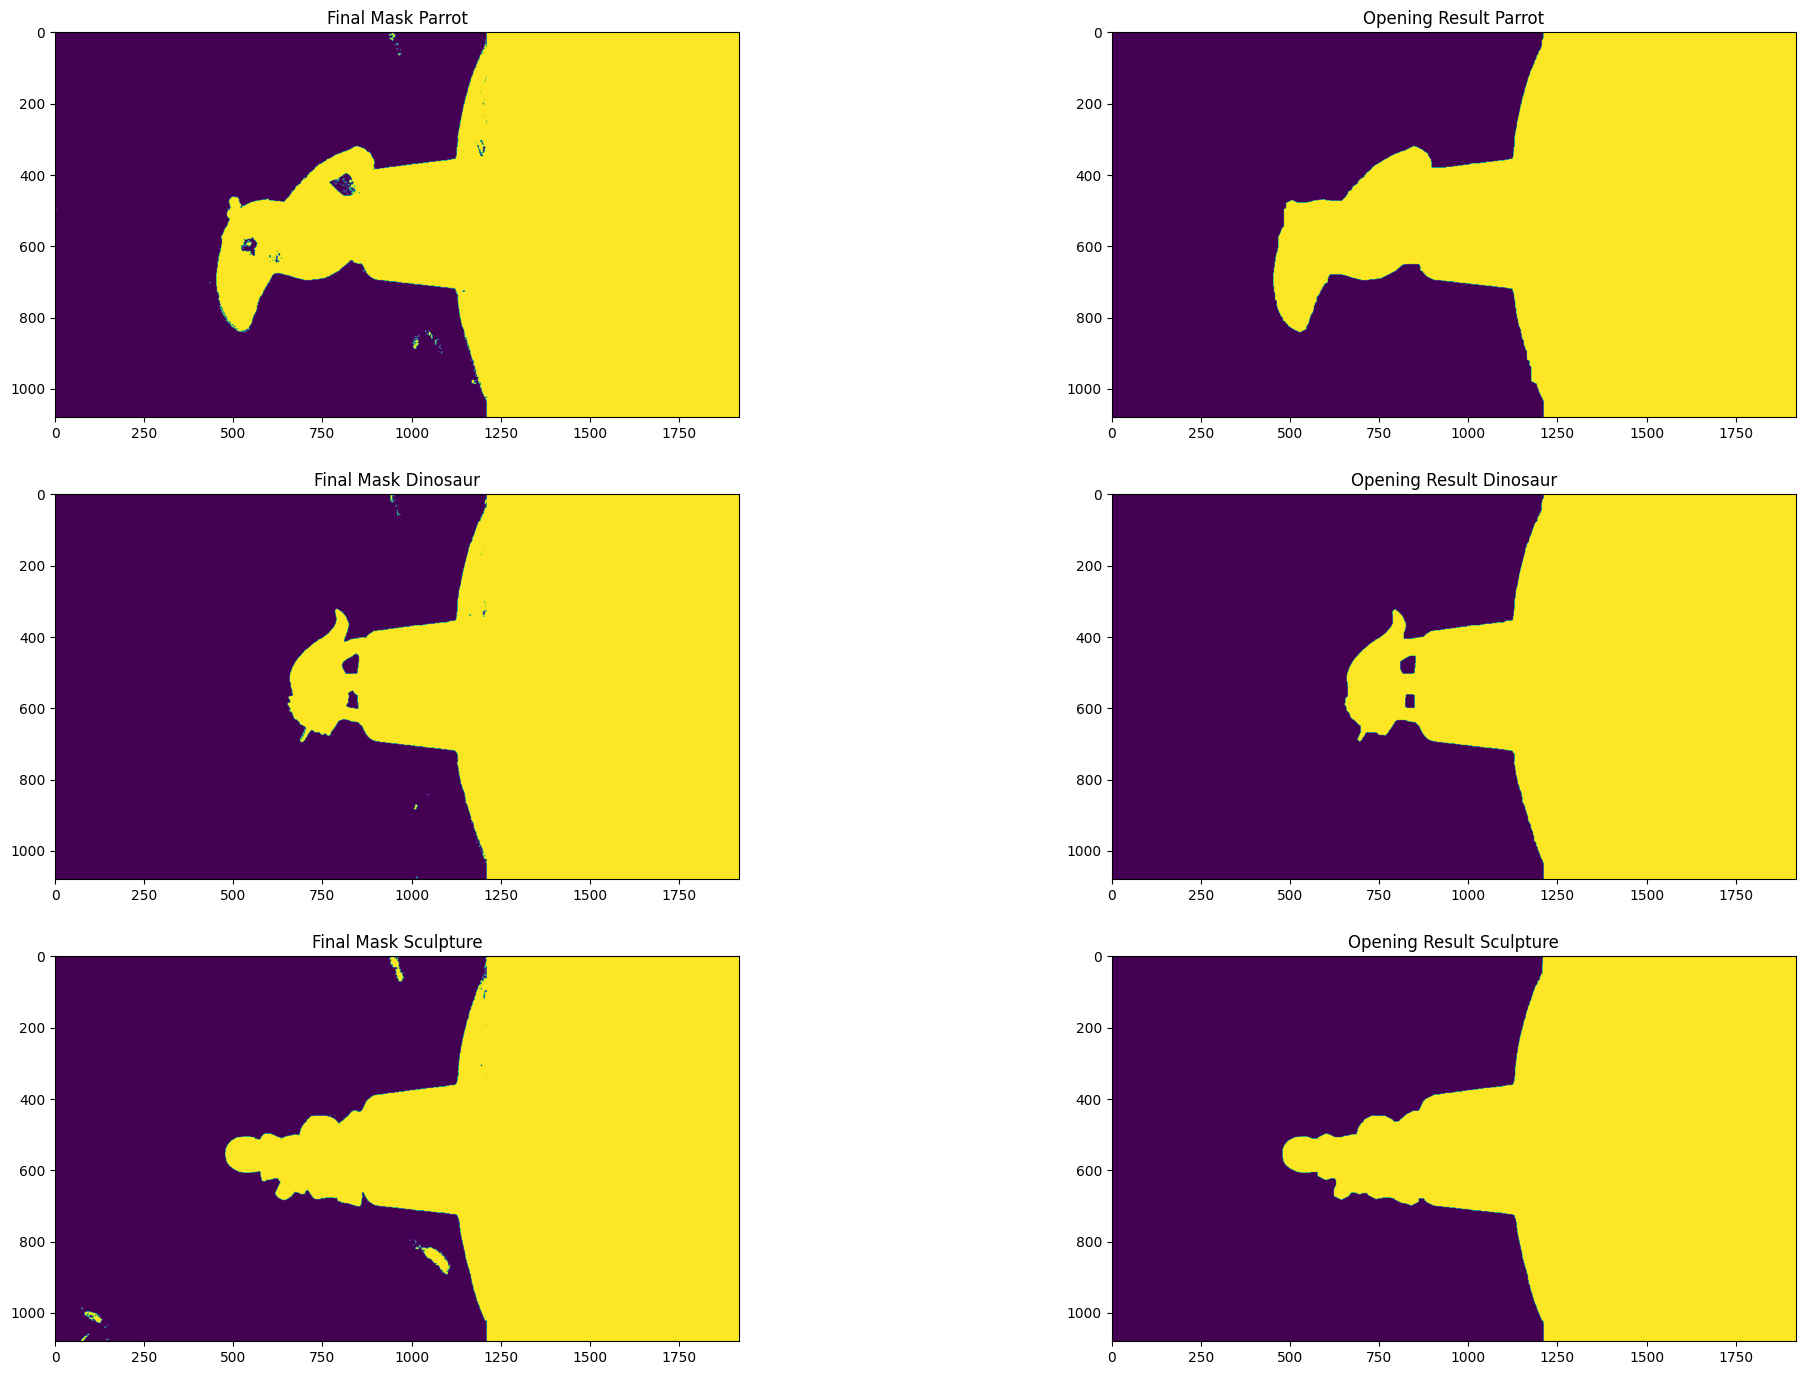

In [85]:
# OPENING

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
kernel2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,3))

opening_obj1 = cv.morphologyEx(closing_obj1, cv.MORPH_OPEN, kernel, iterations=8)
opening_obj2 = cv.morphologyEx(closing_obj2, cv.MORPH_OPEN, kernel2, iterations=7)
opening_obj4 = cv.morphologyEx(closing_obj4, cv.MORPH_OPEN, kernel, iterations=10)


plt.figure(figsize=(25,17))

plt.subplot(3,2,1)
plt.title("Final Mask Parrot")
plt.imshow(mask_obj1)

plt.subplot(3,2,2)
plt.title("Opening Result Parrot")
plt.imshow(opening_obj1)

plt.subplot(3,2,3)
plt.title("Final Mask Dinosaur")
plt.imshow(mask_obj2)

plt.subplot(3,2,4)
plt.title("Opening Result Dinosaur")
plt.imshow(opening_obj2)

plt.subplot(3,2,5)
plt.title("Final Mask Sculpture")
plt.imshow(mask_obj4)

plt.subplot(3,2,6)
plt.title("Opening Result Sculpture")
plt.imshow(opening_obj4)

In [78]:
def apply_segmentation(mask, img):
    segmented = img
    
    foreground = np.where(mask==255)
    background = np.where(mask==0)
    
    segmented[foreground[0], foreground[1], :] = [255, 255, 255]
    segmented[background[0], background[1], :] = [0, 0, 0]
    
    return segmented
    

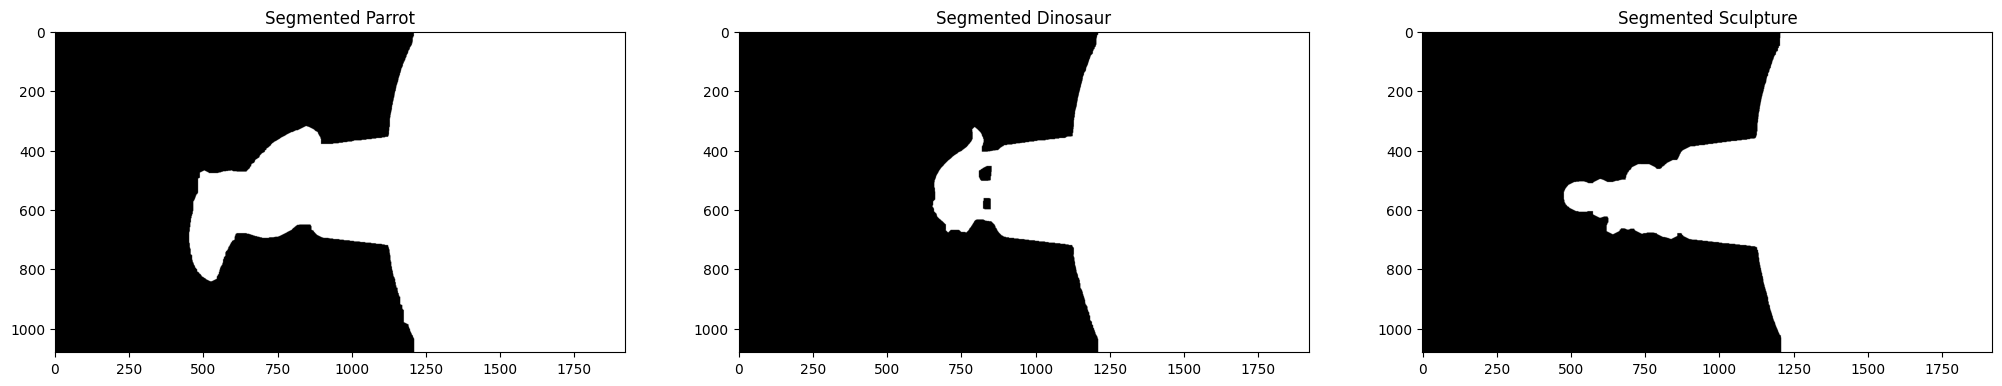

In [79]:
segmented_obj1 = apply_segmentation(opening_obj1, rgb_obj1)
segmented_obj2 = apply_segmentation(opening_obj2, rgb_obj2)
segmented_obj4 = apply_segmentation(opening_obj4, rgb_obj4)


plt.figure(figsize=(25,17))

plt.subplot(1,3,1)
plt.title("Segmented Parrot")
plt.imshow(segmented_obj1)

plt.subplot(1,3,2)
plt.title("Segmented Dinosaur")
plt.imshow(segmented_obj2)

plt.subplot(1,3,3)
plt.title("Segmented Sculpture")
plt.imshow(segmented_obj4)


In [80]:
def precision_recall_accuracy(Y_val, Y_pred):
    TP = len(np.where(Y_val + Y_pred == 2)[0])
    TN = len(np.where(Y_val + Y_pred == 0)[0])
    
    FP = len(np.where(Y_val - Y_pred == -1)[0])
    FN = len(np.where(Y_val - Y_pred == 1)[0])
        
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    return precision, recall, accuracy

# return 0,1 matrix for confusion matrix
def extract_matrix(shape, true_seg):
	result = np.full(shape, 0, np.uint8)
	f_true = np.where(true_seg == 255)[:2]
	result[f_true] = 1

	return result

def return_stats(shape, true_seg, pred_seg):
	Y_true = extract_matrix(shape, true_seg)
	Y_pred = extract_matrix(shape, pred_seg)
	return precision_recall_accuracy(Y_true, Y_pred)

In [81]:
true_seg_obj1 = cv.imread("./assignment1_test_dataset/obj01/000002_mask.png").astype(np.uint8)
true_seg_obj2 = cv.imread("./assignment1_test_dataset/obj02/000002_mask.png").astype(np.uint8)
true_seg_obj4 = cv.imread("./assignment1_test_dataset/obj04/000002_mask.png").astype(np.uint8)


print("Parrot - Precision, Recall, Accuracy", return_stats(rgb_obj1.shape[:2], true_seg_obj1, segmented_obj1))
print("Dinosaurs - Precision, Recall, Accuracy", return_stats(rgb_obj1.shape[:2], true_seg_obj2, segmented_obj2))
print("Sculpture - Precision, Recall, Accuracy", return_stats(rgb_obj1.shape[:2], true_seg_obj4, segmented_obj4))

Parrot - Precision, Recall, Accuracy (1.0, 0.998294061510769, 0.99914735821619)
Dinosaurs - Precision, Recall, Accuracy (1.0, 0.9964294856972981, 0.9983314375685587)
Sculpture - Precision, Recall, Accuracy (1.0, 0.996177273852472, 0.9981827003490874)
